In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
train_data_path = 'cifake dataset/train'
test_data_path = 'cifake dataset/test'

# Create empty lists to store image data and labels
data = []
labels = []

# Loop through the REAL and FAKE subfolders in the train data directory
for folder in os.listdir(train_data_path):
    folder_path = os.path.join(train_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'

    # Loop through the images in each subfolder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))  # we are given 32*32 images but created check for consistency
        data.append(image)
        labels.append(label)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

Validation
Accuracy (MLP): 0.7543
Precision (MLP): 0.7328293537383609
Recall (MLP): 0.7976919217260412
F1-Score (MLP): 0.7638862194887565
Confusion Matrix (MLP):
[[7137 2898]
 [2016 7949]]
Specificity (MLP): 0.7112107623318386
False Positive Rate (MLP): 0.28878923766816145
ROC Curve and AUC-ROC (MLP):


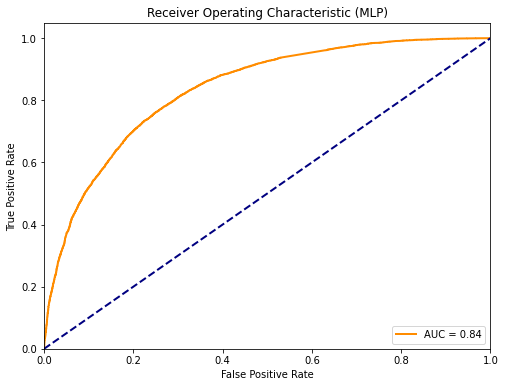

Precision-Recall Curve and AUC-PR (MLP):


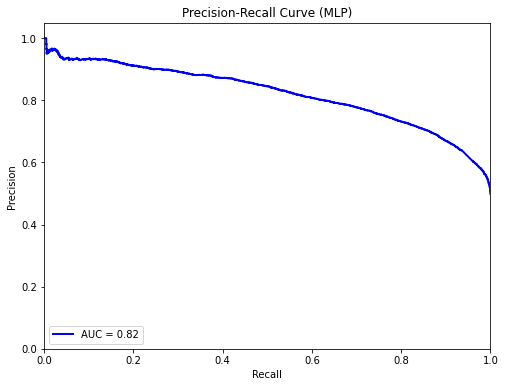

In [3]:
from sklearn.neural_network import MLPClassifier

# Train an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(200,), max_iter=500)
mlp_classifier.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

# Predict on the validation data using MLP
y_pred_mlp = mlp_classifier.predict(X_val.reshape(-1, 32 * 32 * 3))

Validation
Accuracy (MLP): 0.7543
Precision (MLP): 0.7328293537383609
Recall (MLP): 0.7976919217260412
F1-Score (MLP): 0.7638862194887565
Confusion Matrix (MLP):
[[7137 2898]
 [2016 7949]]
Specificity (MLP): 0.7112107623318386
False Positive Rate (MLP): 0.28878923766816145
ROC Curve and AUC-ROC (MLP):


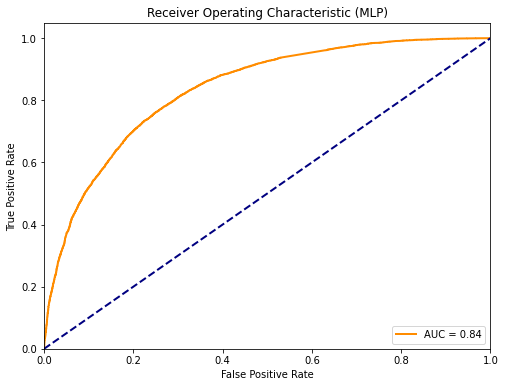

Precision-Recall Curve and AUC-PR (MLP):


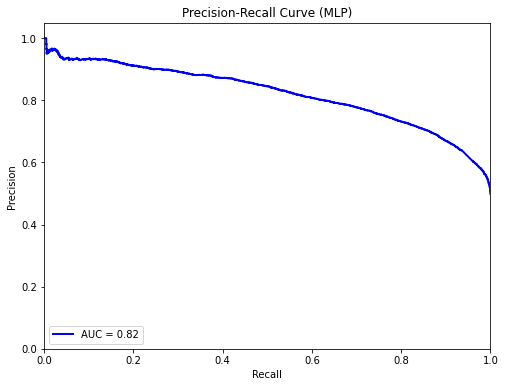

In [6]:
# Calculate accuracy on validation data using MLP predictions
accuracy_mlp = accuracy_score(y_val, y_pred_mlp)
print("Validation")
print(f"Accuracy (MLP): {accuracy_mlp}")

# Calculate precision, recall, and F1-Score on validation data using MLP predictions
precision_mlp = precision_score(y_val, y_pred_mlp)
recall_mlp = recall_score(y_val, y_pred_mlp)
f1_mlp = f1_score(y_val, y_pred_mlp)
print(f"Precision (MLP): {precision_mlp}")
print(f"Recall (MLP): {recall_mlp}")
print(f"F1-Score (MLP): {f1_mlp}")

# Calculate the confusion matrix on validation data using MLP predictions
conf_matrix_mlp = confusion_matrix(y_val, y_pred_mlp)
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Calculate specificity and false positive rate on validation data using MLP predictions
tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
fpr_mlp = fp_mlp / (tn_mlp + fp_mlp)
print(f"Specificity (MLP): {specificity_mlp}")
print(f"False Positive Rate (MLP): {fpr_mlp}")

# Calculate ROC curve and AUC-ROC on validation data using MLP predictions
y_scores_mlp = mlp_classifier.predict_proba(X_val.reshape(-1, 32 * 32 * 3))[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_val, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
print("ROC Curve and AUC-ROC (MLP):")
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'AUC = {roc_auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on validation data using MLP predictions
precision_mlp, recall_mlp, _ = precision_recall_curve(y_val, y_scores_mlp)
pr_auc_mlp = average_precision_score(y_val, y_scores_mlp)
print("Precision-Recall Curve and AUC-PR (MLP):")
plt.figure(figsize=(8, 6))
plt.plot(recall_mlp, precision_mlp, color='blue', lw=2, label=f'AUC = {pr_auc_mlp:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (MLP)')
plt.legend(loc='lower left')
plt.show()

In [7]:
# Load and preprocess test data
test_data = []
test_labels = []

for folder in os.listdir(test_data_path):
    folder_path = os.path.join(test_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'
    if folder != '.DS_Store':
        # Loop through the images in each subfolder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))  # Resize to 32x32 pixels
            test_data.append(image)
            test_labels.append(label)

# Convert test data and labels to NumPy arrays
test_data = np.array(test_data)
test_labels = label_encoder.transform(test_labels)  # Encode test labels

In [8]:
# Predict on the test data using MLP
test_scores_mlp = mlp_classifier.predict_proba(test_data.reshape(-1, 32 * 32 * 3))[:, 1]
test_pred_mlp = mlp_classifier.predict(test_data.reshape(-1, 32 * 32 * 3))

In [9]:
# Calculate accuracy on the test data using MLP predictions
test_accuracy_mlp = accuracy_score(test_labels, test_pred_mlp)
print("Test")
print(f"Test Accuracy (MLP): {test_accuracy_mlp}")

# Calculate precision, recall, and F1-Score on test data using MLP predictions
precision_mlp = precision_score(test_labels, test_pred_mlp)
recall_mlp = recall_score(test_labels, test_pred_mlp)
f1_mlp = f1_score(test_labels, test_pred_mlp)
print(f"Precision (MLP): {precision_mlp}")
print(f"Recall (MLP): {recall_mlp}")
print(f"F1-Score (MLP): {f1_mlp}")

# Calculate the confusion matrix on test data using MLP predictions
conf_matrix_mlp = confusion_matrix(test_labels, test_pred_mlp)
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Calculate specificity and false positive rate on test data using MLP predictions
tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
fpr_mlp = fp_mlp / (tn_mlp + fp_mlp)
print(f"Specificity (MLP): {specificity_mlp}")
print(f"False Positive Rate (MLP): {fpr_mlp}")

Test
Test Accuracy (MLP): 0.7495
Precision (MLP): 0.7304211304026598
Recall (MLP): 0.7909
F1-Score (MLP): 0.7594584213558672
Confusion Matrix (MLP):
[[7081 2919]
 [2091 7909]]
Specificity (MLP): 0.7081
False Positive Rate (MLP): 0.2919


ROC Curve and AUC-ROC (MLP):


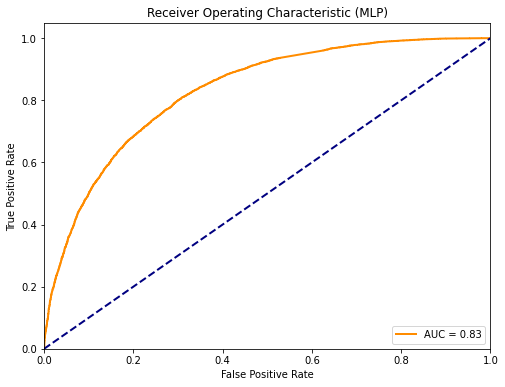

In [10]:
# Calculate ROC curve and AUC-ROC on test data using MLP scores
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(test_labels, test_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
print("ROC Curve and AUC-ROC (MLP):")
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'AUC = {roc_auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Calculate Precision-Recall curve and AUC-PR on test data using MLP scores
precision_mlp, recall_mlp, _ = precision_recall_curve

TypeError: cannot unpack non-iterable function object